# Обработка изображений. Часть 1.
Данные, необходимые для этого модуля:
* cat-bw.png
* cat-color.png
* coin.png

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# загрузка изображений
import imageio

## Загрузка ЧБ изображения

In [5]:
# загружаем изображение в numpy массив
img = imageio.imread('cat-bw.png')

In [6]:
# (высота, ширина, кол-во каналов в картинке)
print(img.shape)

(667, 730, 3)


In [7]:
# (берем нулевой канал картинки)
img_bw = img[:, :, 0]
print(img_bw.shape)

(667, 730)


## Визуализация изображения

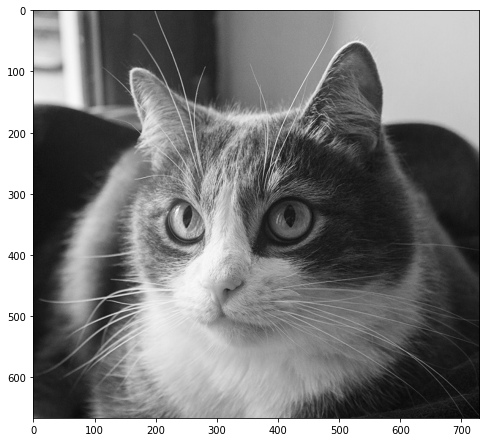

In [10]:
plt.figure(figsize=(8, 8))
# отображение картинки с помощью imshow
# color map - gray. Чтобы 1 означал белый цвет, а 0  - черный
plt.imshow(img_bw, cmap='gray')

In [11]:
# посмотрим на 2D тензор данной картинки
# Видим, что цвета находятся в диапазоне [0:255]
img_bw

Array([[134, 136, 134, ..., 209, 208, 209],
       [132, 135, 135, ..., 210, 211, 208],
       [130, 135, 138, ..., 211, 210, 208],
       ...,
       [ 94,  87,  81, ...,   2,  14,  50],
       [ 99,  95,  90, ...,   8,   8,  25],
       [101,  97,  95, ...,  24,  24,  13]], dtype=uint8)

## Кроп изображения

In [12]:
# Берем срез(кроп) картинки
img_crop = img_bw[100:300, 200:500]
print(img_crop.shape)

(200, 300)


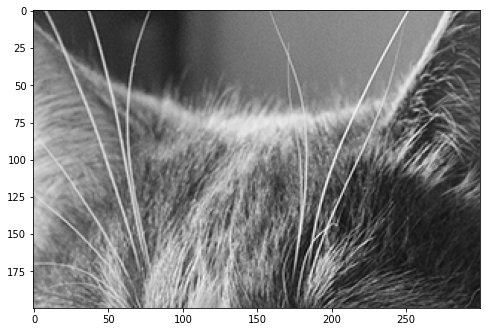

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(img_crop, cmap='gray')

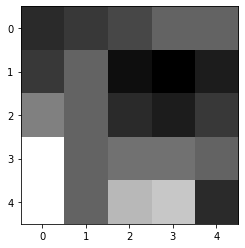

In [14]:
# Возьмем более мелкую область (пиксели)
plt.imshow(img_bw[100:105, 200:205], cmap='gray')

## Изменение изображения

In [15]:
# Изменим значение интенсивности в картинке, присвоив значение 20 (темно-серый цвет)
img_crop[80:130, 70:120] = 20

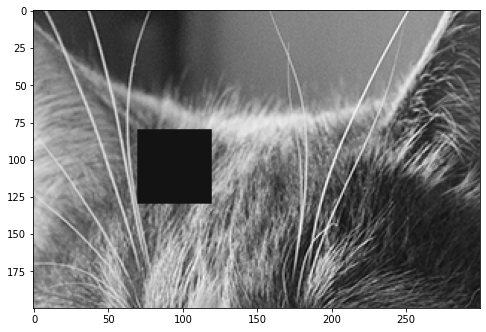

In [16]:
plt.figure(figsize=(8, 8))
plt.imshow(img_crop, cmap='gray')

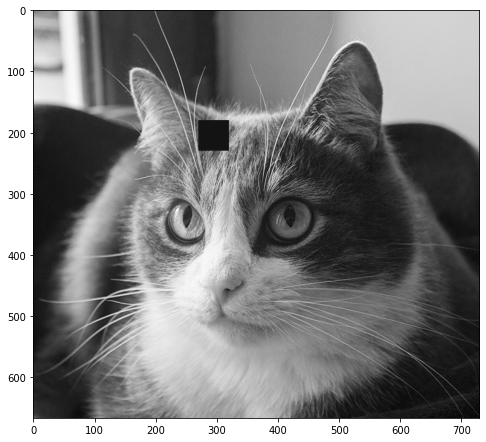

In [17]:
# мы записали в основную картинку, так как не сделали копию
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

## Копирование изображения

In [18]:
# Скопируем изображение, чтобы при изменении объекта не менялся его родитель
img_crop = np.copy(img_bw[300:500, 200:500])
print(img_crop.shape)

(200, 300)


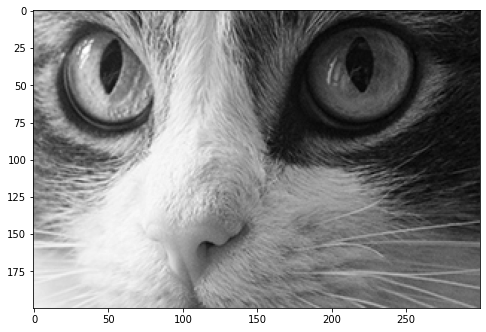

In [19]:
plt.figure(figsize=(8, 8))
plt.imshow(img_crop, cmap='gray')

In [22]:
img_crop[80:130, 70:100] = 20

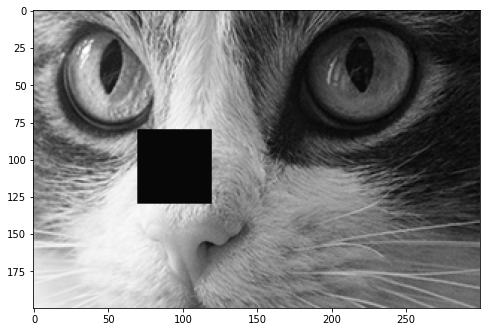

In [23]:
plt.figure(figsize=(8, 8))
plt.imshow(img_crop, cmap='gray')

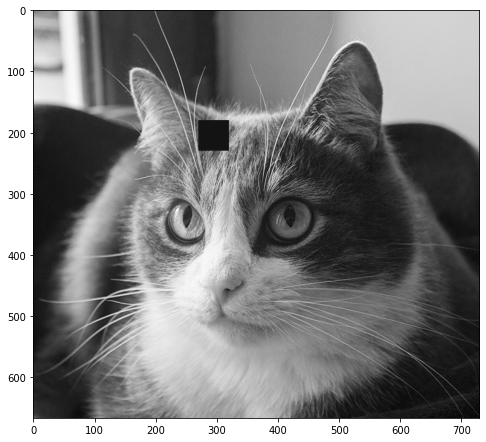

In [24]:
# Теперь всё нормально, оригинал не изменился.
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

## Загрузка цветного изображения


In [25]:
# Загрузим цветную картинку
img = imageio.imread('cat-color.png')
print(img.shape)

(667, 730, 3)


In [27]:
# возьмем трехмерный тензор 5х5хN в левом верхнем углу в RGB
print(img[:5, :5, :])

[[[ 89 117 183]
  [ 89 117 185]
  [ 87 121 185]
  [ 89 123 187]
  [ 89 117 183]]

 [[ 85 113 182]
  [ 88 116 184]
  [ 88 116 184]
  [ 85 113 180]
  [ 86 114 181]]

 [[ 83 111 180]
  [ 88 116 184]
  [ 91 119 187]
  [ 85 113 180]
  [ 85 119 183]]

 [[ 90 123 189]
  [ 89 122 189]
  [ 86 123 186]
  [ 86 123 186]
  [ 90 124 188]]

 [[ 87 122 189]
  [ 88 123 189]
  [ 88 123 189]
  [ 84 123 186]
  [ 91 128 190]]]


## Визуализация цветного изображения

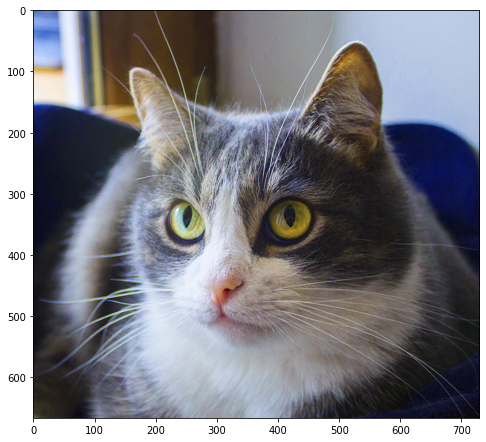

In [29]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

## Визуализация каналов изображения

Можно заметить, что значения яркости на след картинках разные. Если присмотреться к отдельным частям цветной картинки и сравнить их с отображением слоев, можно заметить, что каждый слой отличается от другого и наблюдается какая-то зависимость относительно цветной картинки.

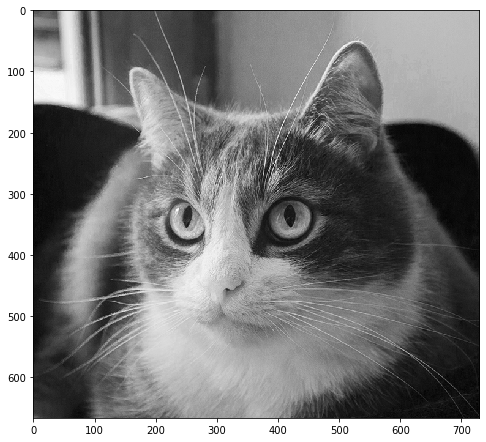

In [ ]:
# Возьмем первый "слой" картинки, который соответствует красному, и визуализируем его как черно-белое
plt.figure(figsize=(8, 8))
plt.imshow(img[:, :, 0], cmap='gray') # Red

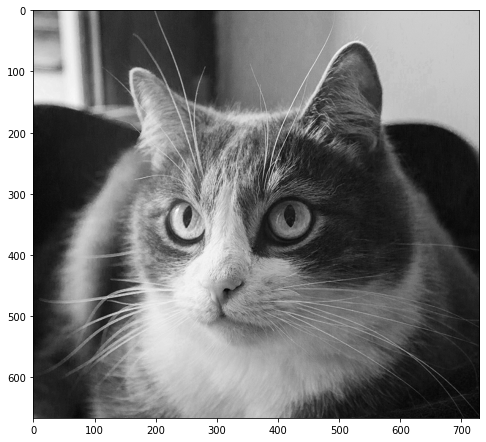

In [30]:
plt.figure(figsize=(8, 8))
plt.imshow(img[:, :, 1], cmap='gray') # Green

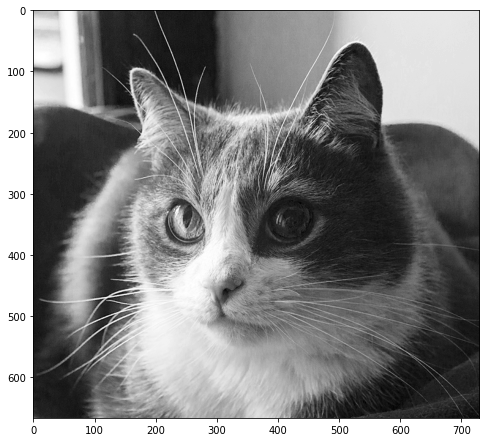

In [31]:
plt.figure(figsize=(8, 8))
plt.imshow(img[:, :, 2], cmap='gray') # Blue

## Цвет пикселя

In [32]:
# Посмотрим, что просходит в конкретном пикселе
print(img[100, 200, :]) # RGB

[79 56 22]


## Преобразование в float32 [0,1]


In [33]:
# сначала изменяем тип в float32 и разделим на 255(чтобы перейти к значениям [0:1])
img = img.astype(np.float32) / 255.

In [34]:
img[:5, :5, :]

Array([[[0.34901962, 0.45882353, 0.7176471 ],
        [0.34901962, 0.45882353, 0.7254902 ],
        [0.34117648, 0.4745098 , 0.7254902 ],
        [0.34901962, 0.48235294, 0.73333335],
        [0.34901962, 0.45882353, 0.7176471 ]],

       [[0.33333334, 0.44313726, 0.7137255 ],
        [0.34509805, 0.45490196, 0.72156864],
        [0.34509805, 0.45490196, 0.72156864],
        [0.33333334, 0.44313726, 0.7058824 ],
        [0.3372549 , 0.44705883, 0.70980394]],

       [[0.3254902 , 0.43529412, 0.7058824 ],
        [0.34509805, 0.45490196, 0.72156864],
        [0.35686275, 0.46666667, 0.73333335],
        [0.33333334, 0.44313726, 0.7058824 ],
        [0.33333334, 0.46666667, 0.7176471 ]],

       [[0.3529412 , 0.48235294, 0.7411765 ],
        [0.34901962, 0.47843137, 0.7411765 ],
        [0.3372549 , 0.48235294, 0.7294118 ],
        [0.3372549 , 0.48235294, 0.7294118 ],
        [0.3529412 , 0.4862745 , 0.7372549 ]],

       [[0.34117648, 0.47843137, 0.7411765 ],
        [0.34509805, 0.482

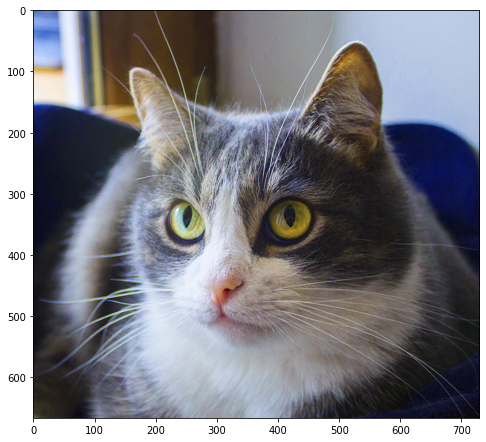

In [35]:
plt.figure(figsize=(8, 8))
plt.imshow(img)